# Notebook for debugging

***

In [152]:
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [54]:
n_images = 1

In [55]:
image_size = (5,5)

In [56]:
size_buffer = 0

In [57]:
figsize = (10,5)

***

## Generate particles

In [178]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(1,1.1),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     signal_to_noise=(5,20),
                     diameter_std=0.1,
                     seeding_mode='random', 
                     random_seed=2)

In [179]:
image = Image(random_seed=100)

In [180]:
image.add_particles(particles)

Particles added to the image.


In [195]:
r = particles.particle_diameters[0][0]/2
r

0.5469438159650024

In [181]:
y_coord = particles.particle_coordinates[0][0]
x_coord = particles.particle_coordinates[0][1]
print(y_coord, x_coord)

[2.10183901] [1.65167411]


In [ ]:
y_coord - 

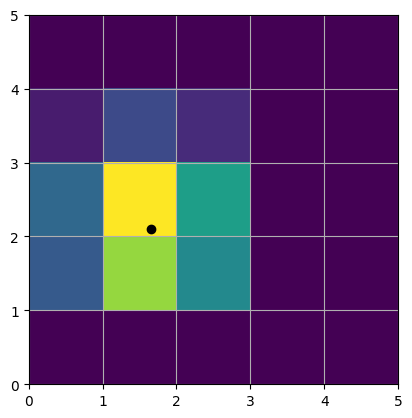

In [186]:
plt.scatter(x_coord, y_coord, c='k')
im = plt.imshow(image.images_I1[0], origin='lower')
plt.grid()
f = lambda pixel: pixel + 0.5
im.set_extent([f(x) for x in im.get_extent()])

In [189]:
idx_height, idx_width = np.where(image.images_I1[0]!=0)

In [190]:
idx_height

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [191]:
idx_width

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

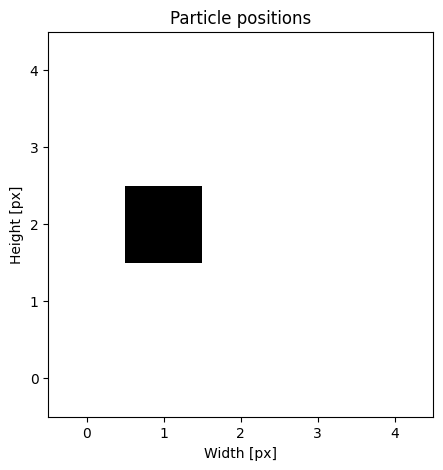

In [183]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           figsize=figsize, 
           filename='particle-positions.png');

In [184]:
image.add_reflected_light(exposures=(0.01,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1)

Reflected light added to images I1.


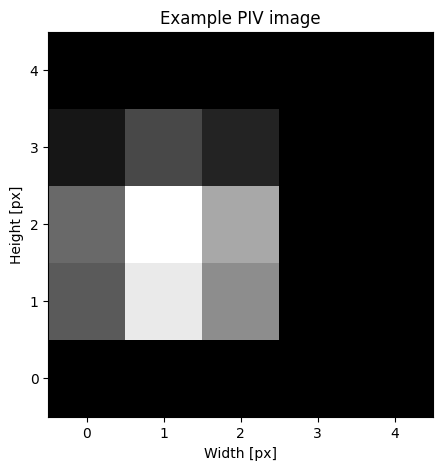

In [185]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image.png');

In [145]:
# plt.scatter(particles.particle_coordinates[0][1], particles.particle_coordinates[0][0], c='k', s=10, zorder=10)
# plt.xticks([i for i in range(0,particles.size_with_buffer[1]+1)])
# plt.yticks([i for i in range(0,particles.size_with_buffer[0]+1)])
# plt.grid(zorder=1)

***

## Generate random velocity field to advect the particles

In [13]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      flow_mode='random',
                      gaussian_filters=(10,11),
                      n_gaussian_filter_iter=20,
                      sin_period=(30,300),
                      displacement=(0,10),
                      random_seed=100)

In [14]:
image.add_velocity_field(flowfield)

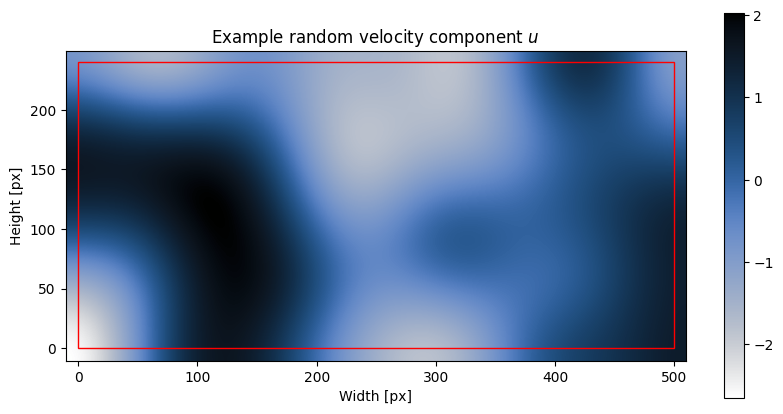

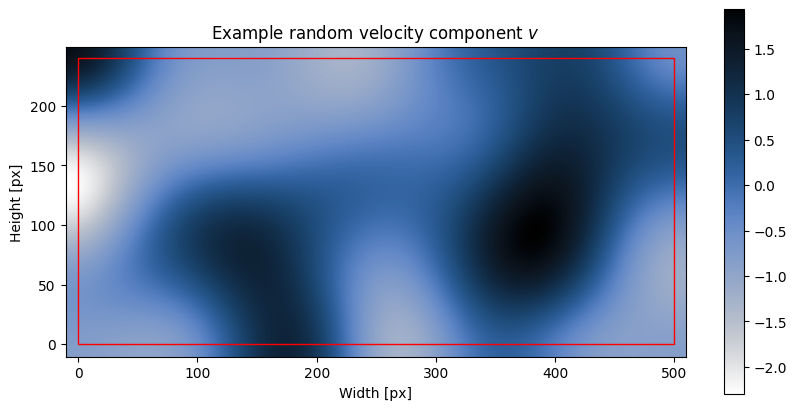

In [25]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=figsize,
                          filename='example-random-velocity-field.png');

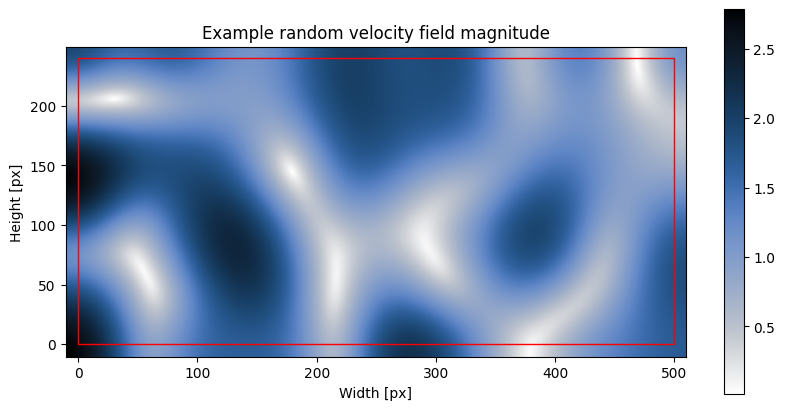

In [26]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude.png');

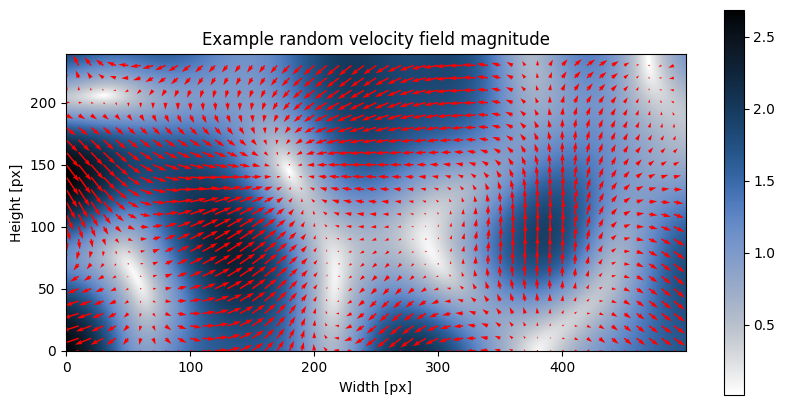

In [27]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-quiver.png');

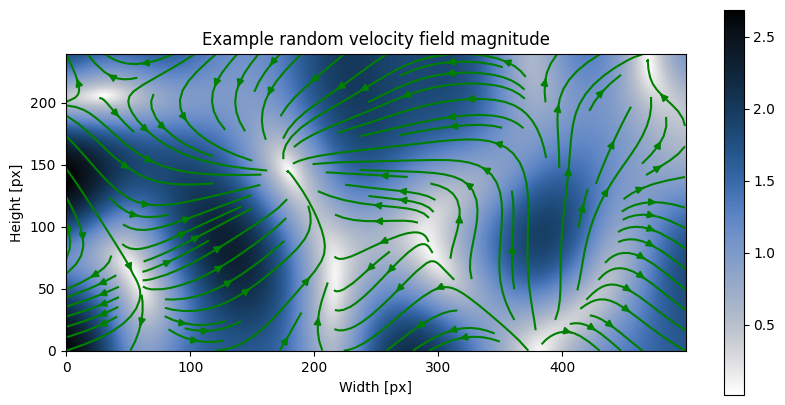

In [28]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-streamplot.png');

***

## Add movement to particles

In [32]:
motion = Motion(particles, 
                flowfield, 
                time_separation=0.1)

In [33]:
motion.forward_euler(n_steps=10)

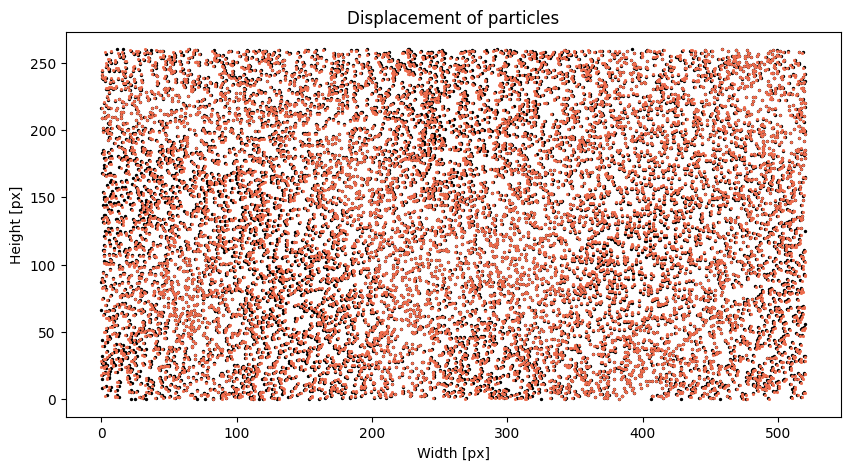

In [34]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-01.png');

#### Update time separation:

In [35]:
motion.time_separation = 0.5

In [36]:
motion.forward_euler(n_steps=10)

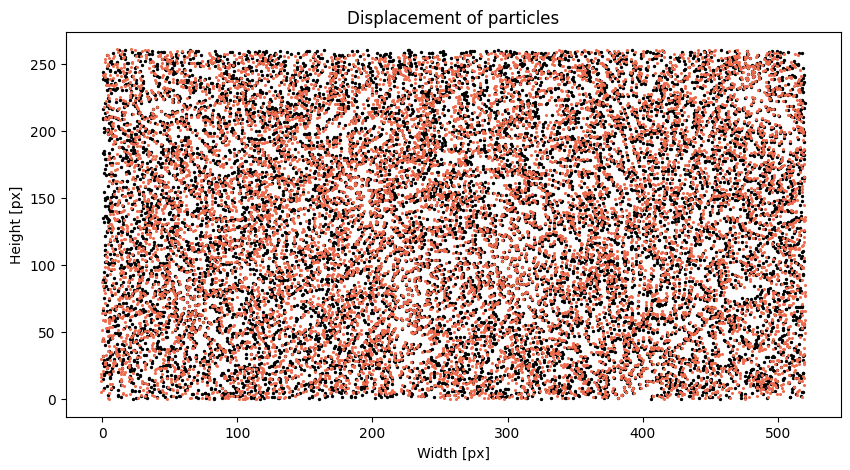

In [37]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-05.png');

#### Visualize the PIV image pair:

In [38]:
image.add_motion(motion)

In [39]:
image.add_reflected_light(exposures=(0.01,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

Reflected light added to images I1.
Reflected light added to images I2.


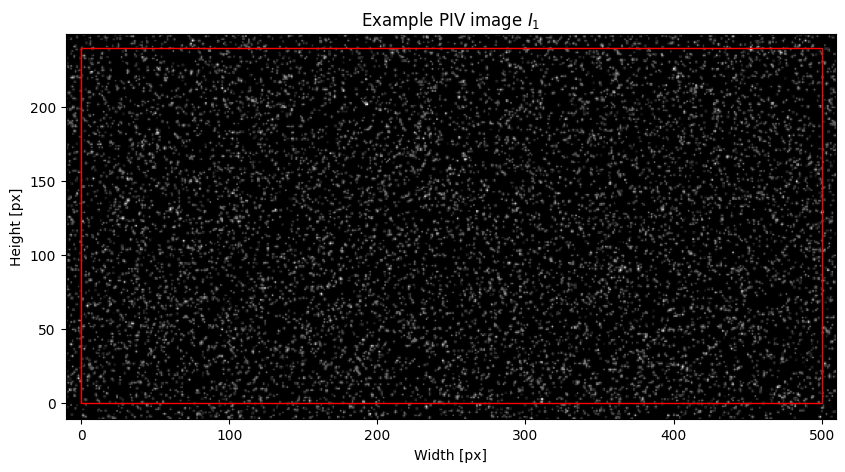

In [40]:
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I1-with-buffer.png');

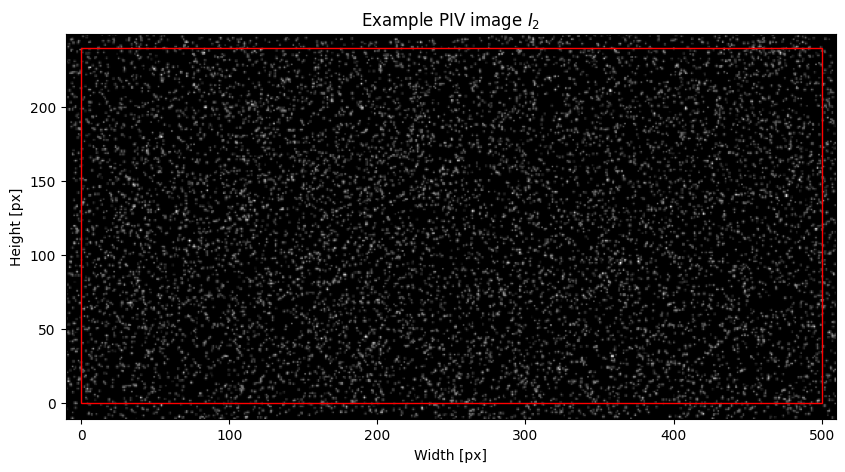

In [41]:
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I2-with-buffer.png');

MovieWriter ffmpeg unavailable; using Pillow instead.


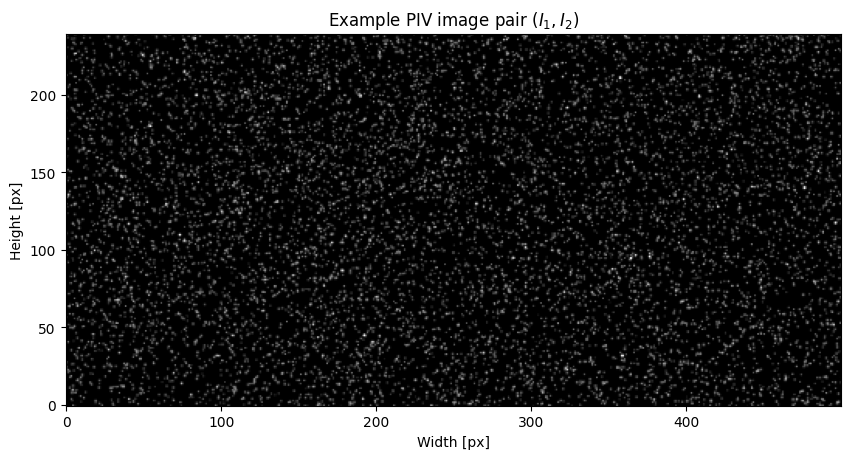

In [43]:
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='Example PIV image pair $(I_1, I_2)$',
                      cmap='Greys_r',
                      figsize=figsize, 
                      filename='example-image-I1-I2-no-buffer.gif');

***